# 📊 Analyse Exploratoire des Données (EDA)
## Projet de Prédiction des Crimes de Los Angeles

Ce notebook contient l'analyse exploratoire complète des données criminelles de Los Angeles pour l'année 2020.

## 1. Importation des Bibliothèques

In [3]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Configuration initiale
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


## 2. Chargement et Aperçu des Données

In [4]:
# Chemin vers les données
DATA_PATH = "../data/raw/crime_Data_2020.csv"

# Chargement
df = pd.read_csv(DATA_PATH)
print(f"📂 Données chargées : {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f"\n📊 Période : {df['DATE OCC'].min()} à {df['DATE OCC'].max()}")

📂 Données chargées : 199840 lignes, 28 colonnes

📊 Période : 2020-01-01 à 2020-12-31


In [5]:
# Aperçu des premières lignes
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [6]:
# Informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199840 entries, 0 to 199839
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           199840 non-null  int64  
 1   Date Rptd       199840 non-null  object 
 2   DATE OCC        199840 non-null  object 
 3   TIME OCC        199840 non-null  int64  
 4   AREA            199840 non-null  int64  
 5   AREA NAME       199840 non-null  object 
 6   Rpt Dist No     199840 non-null  int64  
 7   Part 1-2        199840 non-null  int64  
 8   Crm Cd          199840 non-null  int64  
 9   Crm Cd Desc     199840 non-null  object 
 10  Mocodes         173083 non-null  object 
 11  Vict Age        199840 non-null  int64  
 12  Vict Sex        174354 non-null  object 
 13  Vict Descent    174351 non-null  object 
 14  Premis Cd       199838 non-null  float64
 15  Premis Desc     199771 non-null  object 
 16  Weapon Used Cd  72976 non-null   float64
 17  Weapon Des

In [7]:
# Statistiques descriptives
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.998400e+05,199840.000000,199840.000000,199840.000000,199840.000000,199840.000000,199840.000000,199838.000000,72976.000000,199838.000000,16392.000000,581.000000,17.000000,199840.000000,199840.000000
mean,2.016744e+08,1351.303403,10.838246,1129.851236,1.420041,509.553838,30.066168,296.684234,364.850951,509.266736,952.130918,984.533563,983.588235,33.938294,-117.886326
std,3.344939e+06,649.111115,6.038029,603.910840,0.493566,209.914934,21.748316,212.566364,121.172752,209.688303,118.724590,48.616348,45.015357,2.142425,7.432165
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,626.000000,821.000000,0.000000,-118.667600
25%,2.006095e+08,920.000000,6.000000,632.000000,1.000000,330.000000,12.000000,101.000000,311.000000,330.000000,998.000000,998.000000,998.000000,34.008500,-118.431200
50%,2.012065e+08,1430.000000,11.000000,1153.000000,1.000000,510.000000,31.000000,203.000000,400.000000,510.000000,998.000000,998.000000,998.000000,34.058000,-118.322300
75%,2.017065e+08,1900.000000,16.000000,1636.000000,2.000000,626.000000,46.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.165500,-118.274300
max,2.421138e+08,2359.000000,21.000000,2198.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,998.000000,34.329300,0.000000


## 3. Analyse des Valeurs Manquantes

In [8]:
# Calcul des valeurs manquantes
missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Valeurs Manquantes': missing.values,
    'Pourcentage': missing_pct.values
}).sort_values('Pourcentage', ascending=False)

# Filtrer uniquement les colonnes avec des valeurs manquantes
missing_df = missing_df[missing_df['Valeurs Manquantes'] > 0]

print("🔍 Colonnes avec valeurs manquantes :")
missing_df

🔍 Colonnes avec valeurs manquantes :


,Colonne,Valeurs Manquantes,Pourcentage
23,Crm Cd 4,199823,99.991493
22,Crm Cd 3,199259,99.709267
21,Crm Cd 2,183448,91.797438
25,Cross Street,164821,82.476481
16,Weapon Used Cd,126864,63.482786
17,Weapon Desc,126864,63.482786
10,Mocodes,26757,13.389211
13,Vict Descent,25489,12.754704
12,Vict Sex,25486,12.753203
15,Premis Desc,69,0.034528


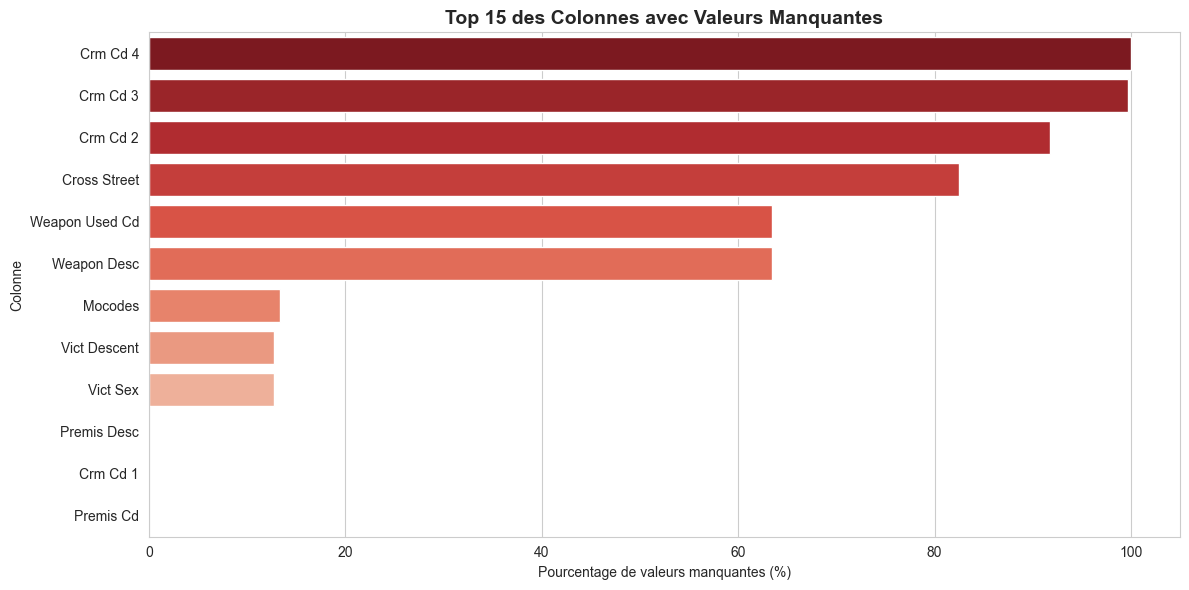

In [9]:
# Visualisation des valeurs manquantes
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=missing_df.head(15), x='Pourcentage', y='Colonne', palette='Reds_r')
    plt.title('Top 15 des Colonnes avec Valeurs Manquantes', fontsize=14, fontweight='bold')
    plt.xlabel('Pourcentage de valeurs manquantes (%)')
    plt.ylabel('Colonne')
    plt.tight_layout()
    plt.show()
else:
    print("✅ Aucune valeur manquante !")

## 4. Nettoyage des Données

In [10]:
def clean_data(df):
    """Nettoie et prépare les données pour l'analyse"""
    print("🔧 Nettoyage des données en cours...")
    
    # Suppression des colonnes inutiles
    cols_to_drop = ['Weapon Used Cd', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 
                   'Cross Street', 'Mocodes', 'Weapon Desc']
    df = df.drop([col for col in cols_to_drop if col in df.columns], axis=1)
    
    # Conversion des dates
    date_cols = ['Date Rptd', 'DATE OCC']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Gestion des valeurs manquantes - Catégorielles
    cat_cols = ['Vict Sex', 'Vict Descent', 'Premis Desc', 'Status Desc']
    for col in cat_cols:
        if col in df.columns and len(df[col].mode()) > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Gestion des valeurs manquantes - Numériques
    num_cols = ['Crm Cd 1', 'Premis Cd', 'Vict Age']
    for col in num_cols:
        if col in df.columns:
            df[col].fillna(df[col].median(), inplace=True)
    
    # Correction de l'âge des victimes
    if 'Vict Age' in df.columns:
        df['Vict Age'] = df['Vict Age'].where(df['Vict Age'] >= 0, df['Vict Age'].median())
    
    # Gestion des coordonnées géographiques
    if 'LON' in df.columns:
        df['LON'] = df['LON'].replace(0.00, pd.NA)
    if 'LAT' in df.columns:
        df['LAT'] = df['LAT'].where(df['LAT'] >= 0, pd.NA)
    
    # Suppression des doublons
    initial_shape = df.shape[0]
    df.drop_duplicates(inplace=True)
    print(f"   ✓ {initial_shape - df.shape[0]} doublons supprimés")
    
    # Création de caractéristiques temporelles
    if 'DATE OCC' in df.columns:
        df['Day of Week'] = df['DATE OCC'].dt.day_name()
        df['Month'] = df['DATE OCC'].dt.month_name()
        df['Year'] = df['DATE OCC'].dt.year
        df['Day Type'] = df['DATE OCC'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
        df['Day_of_week'] = df['DATE OCC'].dt.dayofweek
        df['Month_num'] = df['DATE OCC'].dt.month
    
    if 'TIME OCC' in df.columns:
        df['Hour'] = df['TIME OCC'] // 100
        df['Hour of Day'] = df['Hour']
    
    print(f"✅ Nettoyage terminé. Nouvelle dimension : {df.shape}")
    return df

# Appliquer le nettoyage
df_clean = clean_data(df.copy())

🔧 Nettoyage des données en cours...
   ✓ 0 doublons supprimés
✅ Nettoyage terminé. Nouvelle dimension : (199840, 29)


## 5. Analyse Temporelle

### 5.1 Distribution Temporelle Globale

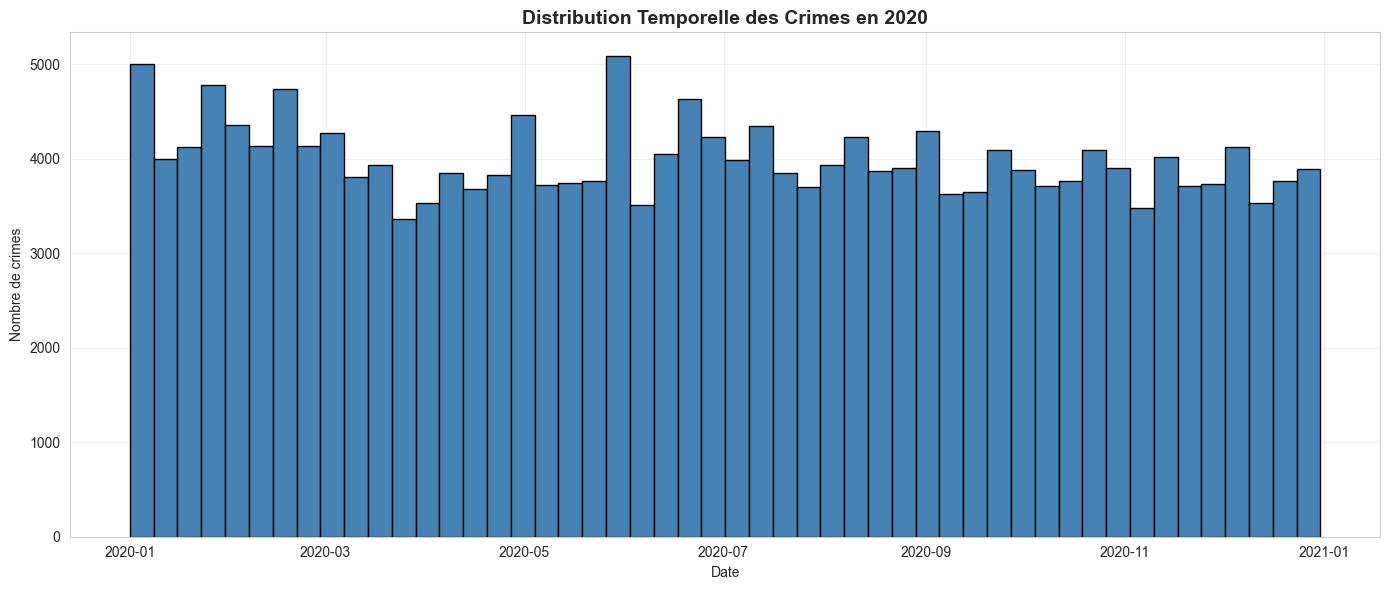

In [11]:
plt.figure(figsize=(14, 6))
df_clean['DATE OCC'].hist(bins=50, edgecolor='black', color='steelblue')
plt.title('Distribution Temporelle des Crimes en 2020', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Nombre de crimes')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2 Distribution Horaire

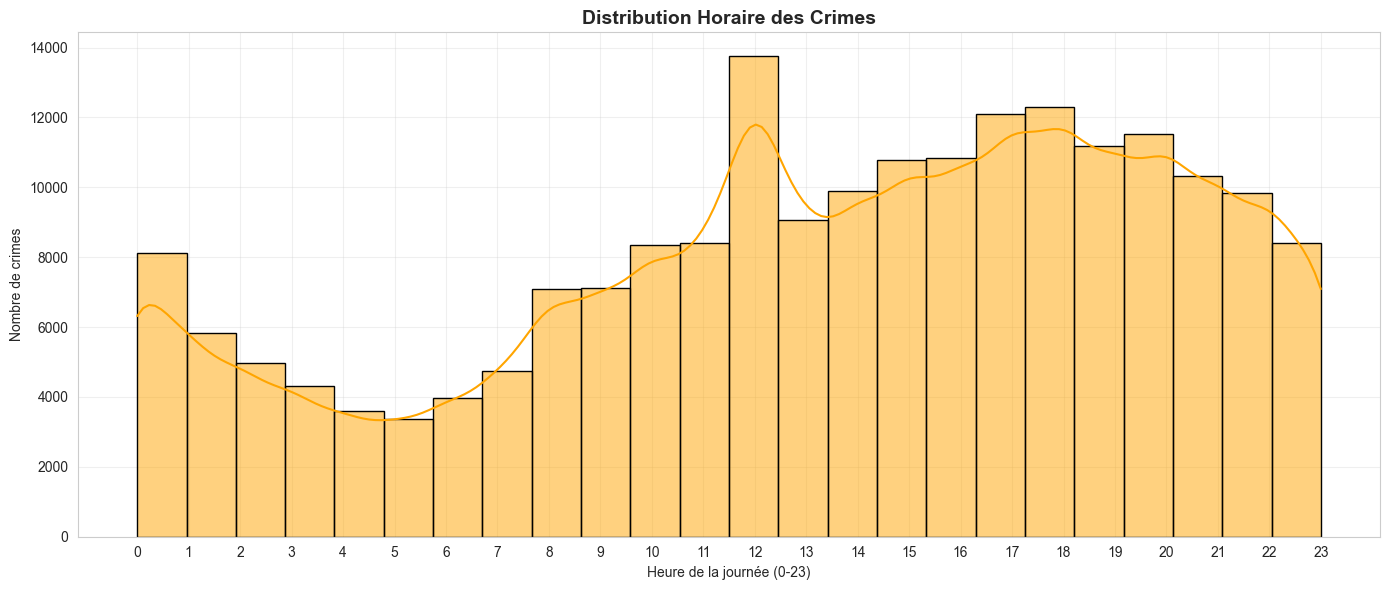


📊 Statistiques horaires :
   Heure la plus criminelle : 12h
   Heure la moins criminelle : 5h


In [12]:
plt.figure(figsize=(14, 6))
sns.histplot(df_clean['Hour of Day'].dropna(), bins=24, kde=True, color='orange', edgecolor='black')
plt.title('Distribution Horaire des Crimes', fontsize=14, fontweight='bold')
plt.xlabel('Heure de la journée (0-23)')
plt.ylabel('Nombre de crimes')
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Statistiques horaires
print("\n📊 Statistiques horaires :")
print(f"   Heure la plus criminelle : {df_clean['Hour of Day'].mode()[0]}h")
print(f"   Heure la moins criminelle : {df_clean['Hour of Day'].value_counts().idxmin()}h")

### 5.3 Crimes par Jour de la Semaine

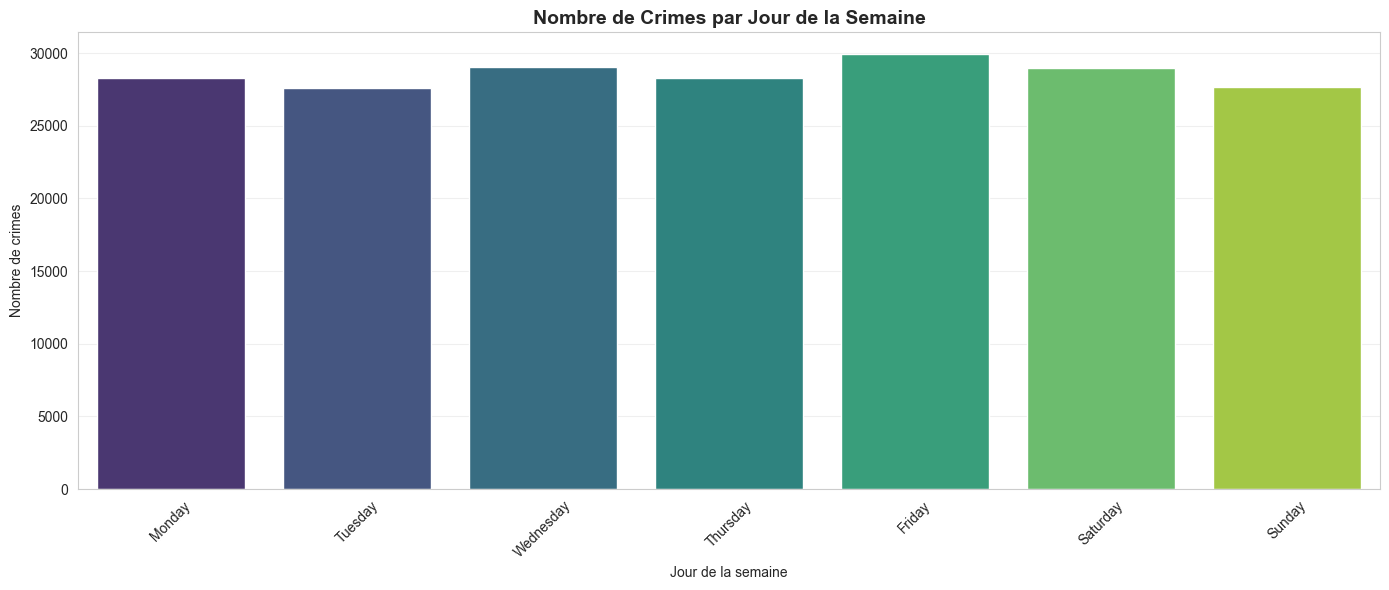


📊 Jour le plus criminel : Friday
📊 Jour le moins criminel : Tuesday


In [13]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes_by_day = df_clean['Day of Week'].value_counts().reindex(days_order)

plt.figure(figsize=(14, 6))
sns.barplot(x=crimes_by_day.index, y=crimes_by_day.values, palette='viridis')
plt.title('Nombre de Crimes par Jour de la Semaine', fontsize=14, fontweight='bold')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Jour le plus criminel :", crimes_by_day.idxmax())
print("📊 Jour le moins criminel :", crimes_by_day.idxmin())

### 5.4 Weekday vs Weekend

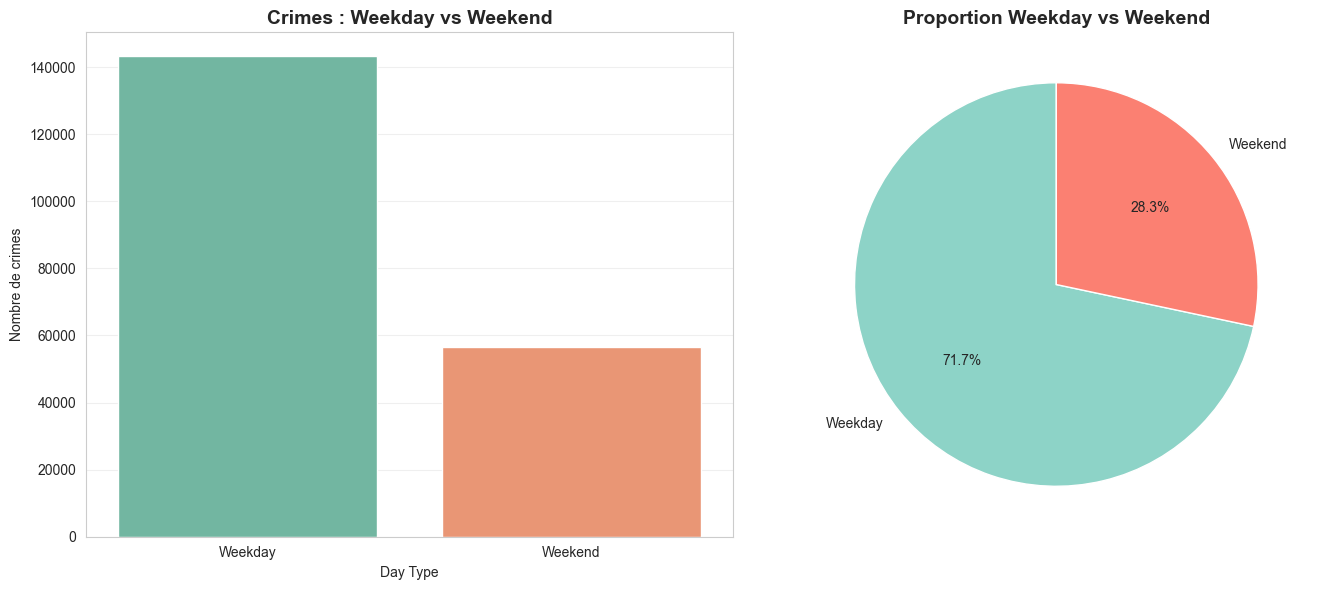

In [14]:
daytype_counts = df_clean['Day Type'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graphique en barres
sns.barplot(x=daytype_counts.index, y=daytype_counts.values, palette='Set2', ax=ax1)
ax1.set_title('Crimes : Weekday vs Weekend', fontsize=14, fontweight='bold')
ax1.set_ylabel('Nombre de crimes')
ax1.grid(axis='y', alpha=0.3)

# Camembert
ax2.pie(daytype_counts.values, labels=daytype_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['#8dd3c7', '#fb8072'])
ax2.set_title('Proportion Weekday vs Weekend', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.5 Évolution Mensuelle

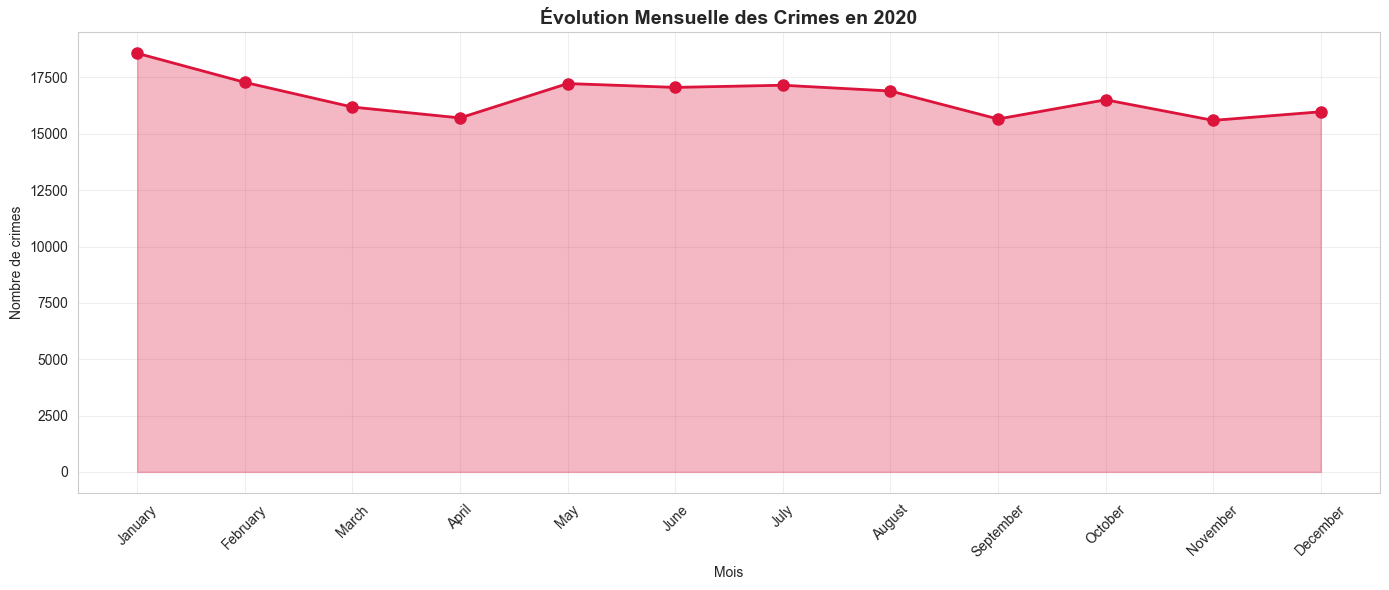


📊 Mois le plus criminel : January (18574 crimes)
📊 Mois le moins criminel : November (15596 crimes)


In [15]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
crimes_by_month = df_clean['Month'].value_counts().reindex(months_order)

plt.figure(figsize=(14, 6))
plt.plot(range(len(crimes_by_month)), crimes_by_month.values, marker='o', 
         linewidth=2, markersize=8, color='crimson')
plt.fill_between(range(len(crimes_by_month)), crimes_by_month.values, alpha=0.3, color='crimson')
plt.title('Évolution Mensuelle des Crimes en 2020', fontsize=14, fontweight='bold')
plt.xlabel('Mois')
plt.ylabel('Nombre de crimes')
plt.xticks(range(len(crimes_by_month)), crimes_by_month.index, rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Mois le plus criminel :", crimes_by_month.idxmax(), f"({crimes_by_month.max()} crimes)")
print("📊 Mois le moins criminel :", crimes_by_month.idxmin(), f"({crimes_by_month.min()} crimes)")

## 6. Analyse Spatiale

### 6.1 Crimes par Zone Géographique

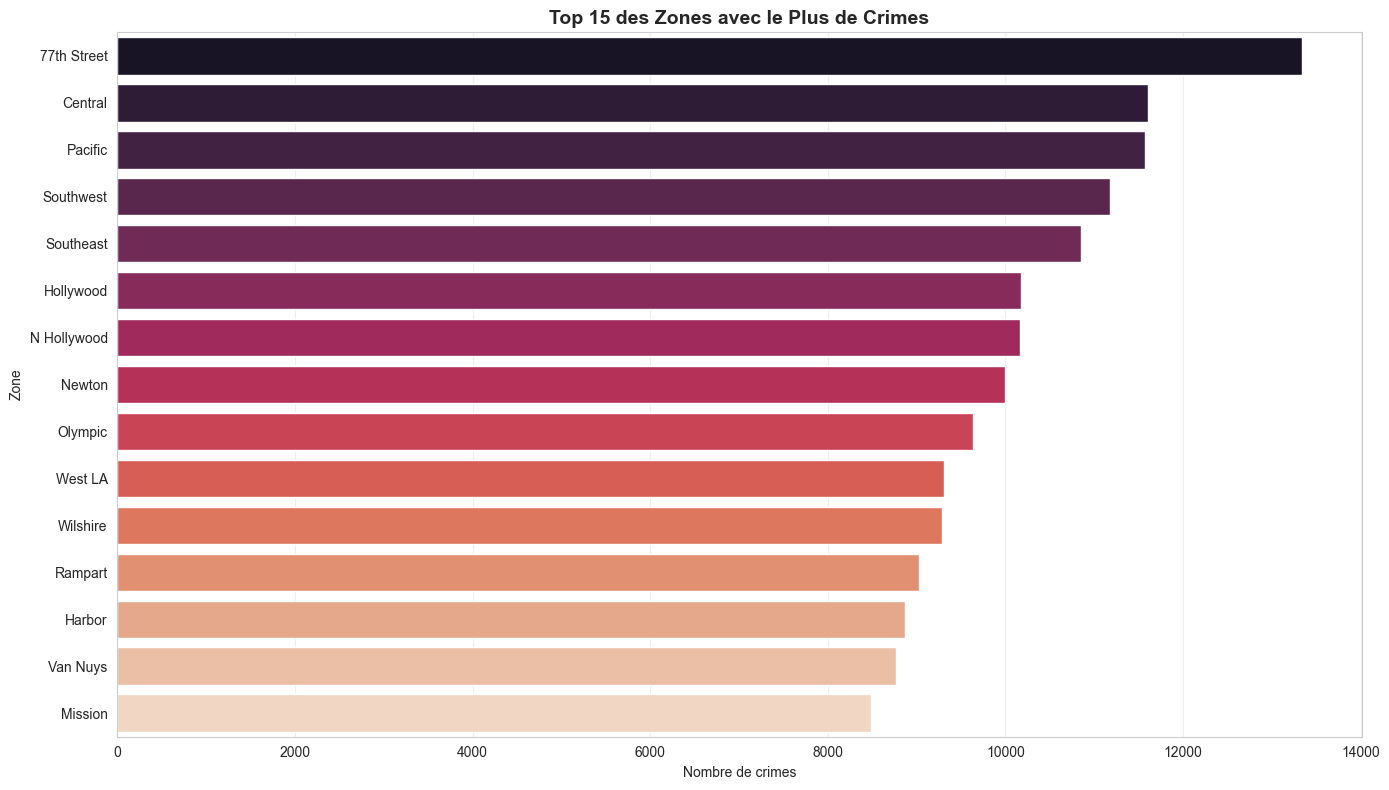


🏙️ Zone la plus criminelle : 77th Street (13346 crimes)


In [16]:
area_counts = df_clean['AREA NAME'].value_counts().head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=area_counts.values, y=area_counts.index, palette='rocket')
plt.title('Top 15 des Zones avec le Plus de Crimes', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de crimes')
plt.ylabel('Zone')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🏙️ Zone la plus criminelle : {area_counts.index[0]} ({area_counts.values[0]} crimes)")

### 6.2 Carte Interactive des Crimes (Plotly)

In [17]:
# Échantillonner les données pour la performance
df_sample = df_clean.dropna(subset=['LAT', 'LON']).sample(n=min(5000, len(df_clean)), random_state=42)

fig = px.scatter_mapbox(
    df_sample, 
    lat='LAT', 
    lon='LON',
    color='AREA NAME',
    hover_data=['Crm Cd Desc', 'DATE OCC'],
    title='Distribution Géographique des Crimes à Los Angeles (Échantillon de 5000 crimes)',
    zoom=9,
    height=600
)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

print("🗺️ Carte interactive générée (5000 crimes échantillonnés)")

🗺️ Carte interactive générée (5000 crimes échantillonnés)


### 6.3 Heatmap des Crimes par Coordonnées

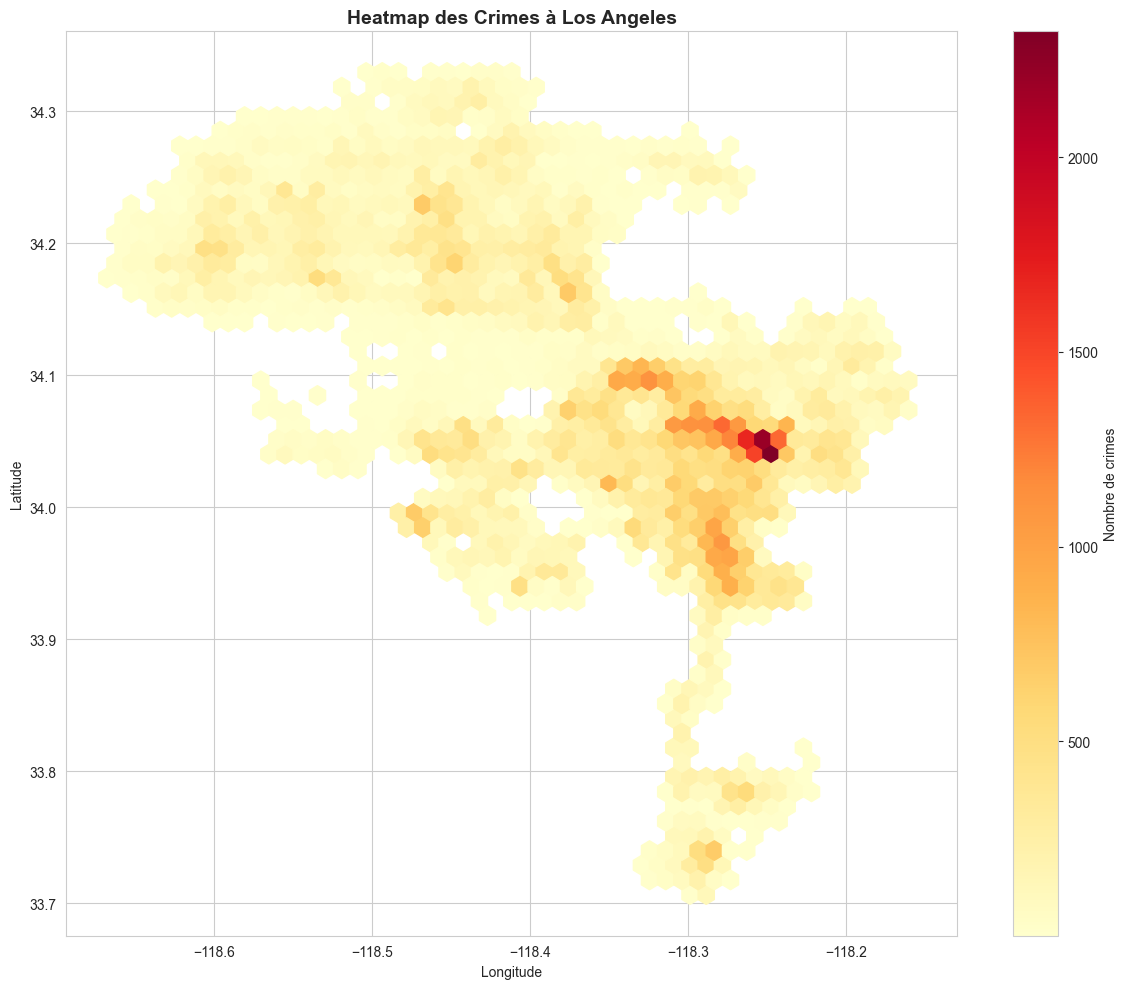

In [18]:
df_geo = df_clean.dropna(subset=['LAT', 'LON'])

plt.figure(figsize=(12, 10))
plt.hexbin(df_geo['LON'], df_geo['LAT'], gridsize=50, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Nombre de crimes')
plt.title('Heatmap des Crimes à Los Angeles', fontsize=14, fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

## 7. Analyse des Types de Crimes

### 7.1 Top 10 des Types de Crimes

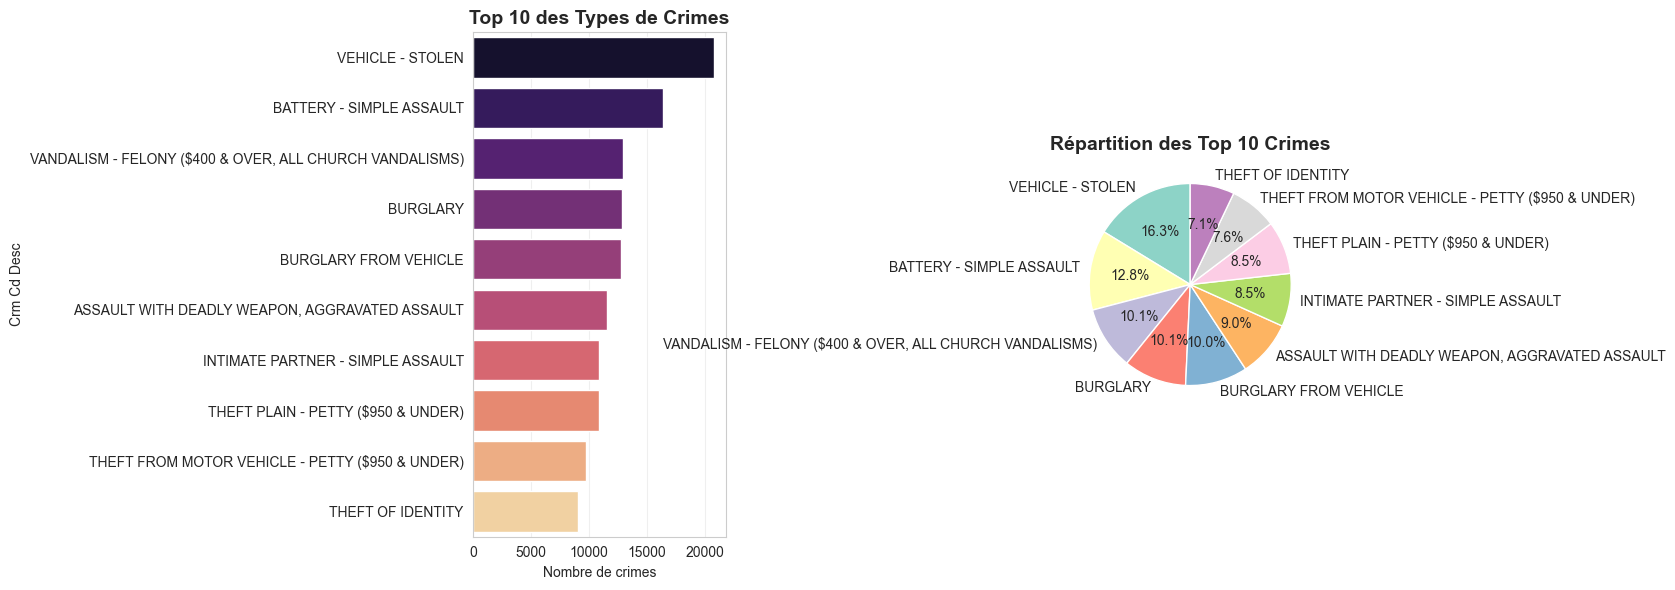


🔴 Crime le plus fréquent : VEHICLE - STOLEN (20772 occurrences)
   Représente 10.39% de tous les crimes


In [19]:
top_crimes = df_clean['Crm Cd Desc'].value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graphique en barres
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='magma', ax=ax1)
ax1.set_title('Top 10 des Types de Crimes', fontsize=14, fontweight='bold')
ax1.set_xlabel('Nombre de crimes')
ax1.grid(axis='x', alpha=0.3)

# Camembert
colors = plt.cm.Set3(range(len(top_crimes)))
ax2.pie(top_crimes.values, labels=top_crimes.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
ax2.set_title('Répartition des Top 10 Crimes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🔴 Crime le plus fréquent : {top_crimes.index[0]} ({top_crimes.values[0]} occurrences)")
print(f"   Représente {(top_crimes.values[0] / len(df_clean)) * 100:.2f}% de tous les crimes")

### 7.2 Distribution de Tous les Types de Crimes

In [20]:
print(f"📊 Nombre total de types de crimes différents : {df_clean['Crm Cd Desc'].nunique()}")
print(f"\nTop 20 des crimes :")
df_clean['Crm Cd Desc'].value_counts().head(20)

📊 Nombre total de types de crimes différents : 129

Top 20 des crimes :


Crm Cd Desc
VEHICLE - STOLEN                                            20772
BATTERY - SIMPLE ASSAULT                                    16331
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     12927
BURGLARY                                                    12837
BURGLARY FROM VEHICLE                                       12714
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              11525
INTIMATE PARTNER - SIMPLE ASSAULT                           10863
THEFT PLAIN - PETTY ($950 & UNDER)                          10857
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              9737
THEFT OF IDENTITY                                            9035
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     6982
ROBBERY                                                      6896
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     5520
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          4785
CRIMINAL THREATS - NO WEAPON DISPLAYED                       419

## 8. Analyse des Victimes

### 8.1 Distribution de l'Âge des Victimes

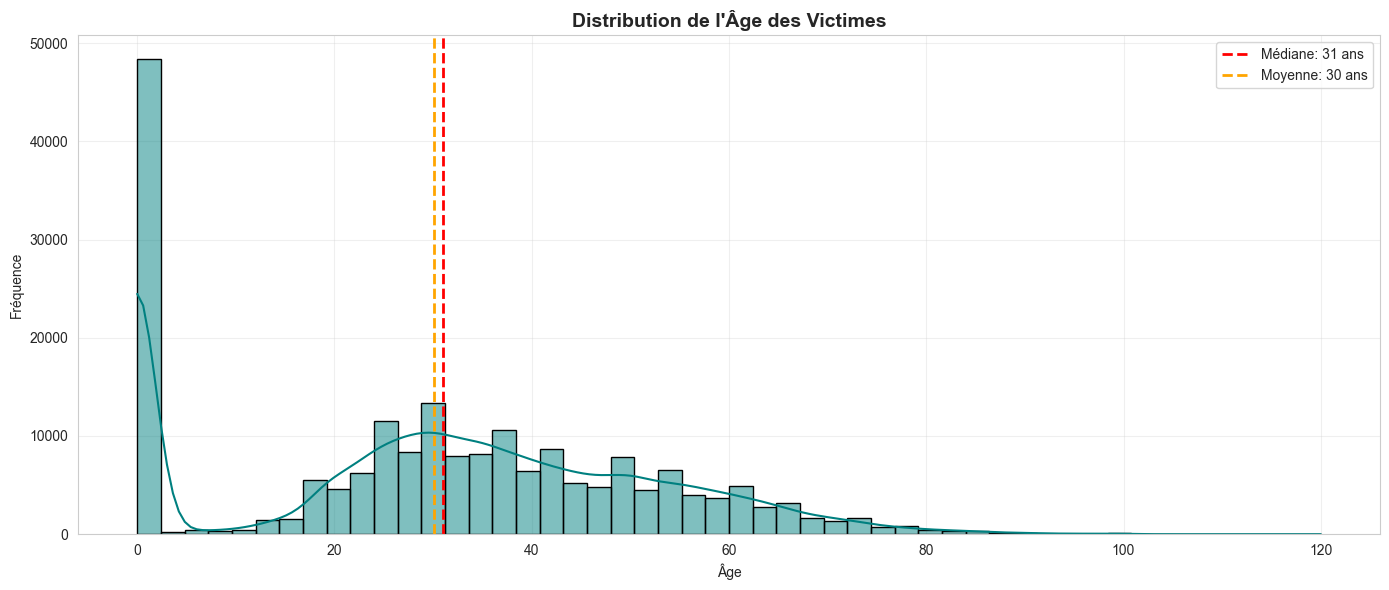


📊 Statistiques sur l'âge des victimes :
count    199840.000000
mean         30.072883
std          21.743545
min           0.000000
25%          12.000000
50%          31.000000
75%          46.000000
max         120.000000
Name: Vict Age, dtype: float64


In [21]:
plt.figure(figsize=(14, 6))
sns.histplot(df_clean['Vict Age'].dropna(), bins=50, kde=True, color='teal', edgecolor='black')
plt.title('Distribution de l\'Âge des Victimes', fontsize=14, fontweight='bold')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.axvline(df_clean['Vict Age'].median(), color='red', linestyle='--', linewidth=2, label=f'Médiane: {df_clean["Vict Age"].median():.0f} ans')
plt.axvline(df_clean['Vict Age'].mean(), color='orange', linestyle='--', linewidth=2, label=f'Moyenne: {df_clean["Vict Age"].mean():.0f} ans')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 Statistiques sur l'âge des victimes :")
print(df_clean['Vict Age'].describe())

### 8.2 Crimes par Sexe de la Victime

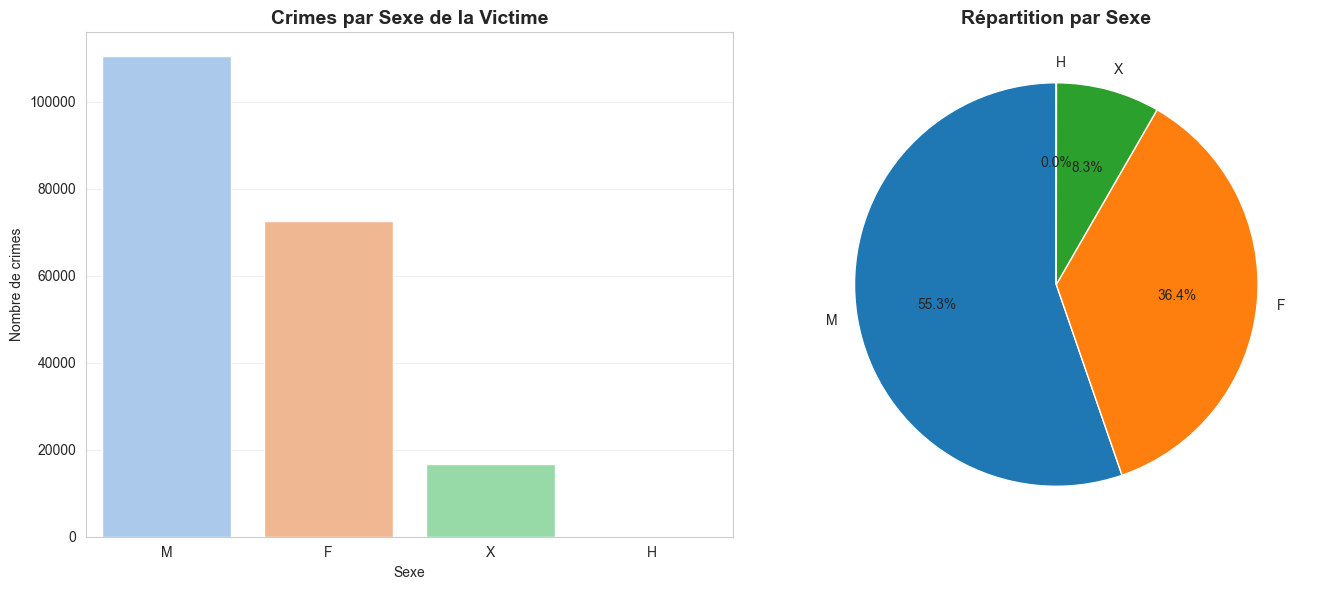

In [22]:
sex_counts = df_clean['Vict Sex'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Barplot
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='pastel', ax=ax1)
ax1.set_title('Crimes par Sexe de la Victime', fontsize=14, fontweight='bold')
ax1.set_ylabel('Nombre de crimes')
ax1.set_xlabel('Sexe')
ax1.grid(axis='y', alpha=0.3)

# Pie chart
ax2.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Répartition par Sexe', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 8.3 Crimes par Origine de la Victime

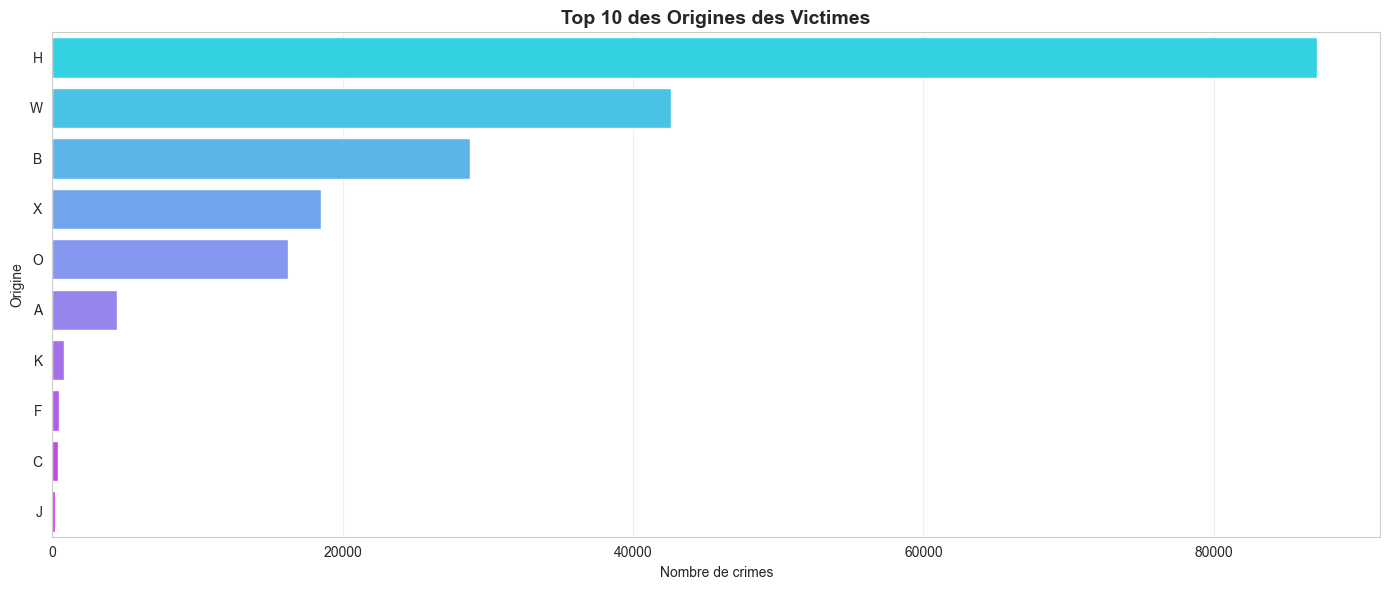

In [23]:
descent_counts = df_clean['Vict Descent'].value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=descent_counts.values, y=descent_counts.index, palette='cool')
plt.title('Top 10 des Origines des Victimes', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de crimes')
plt.ylabel('Origine')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Analyse des Lieux (Premis)

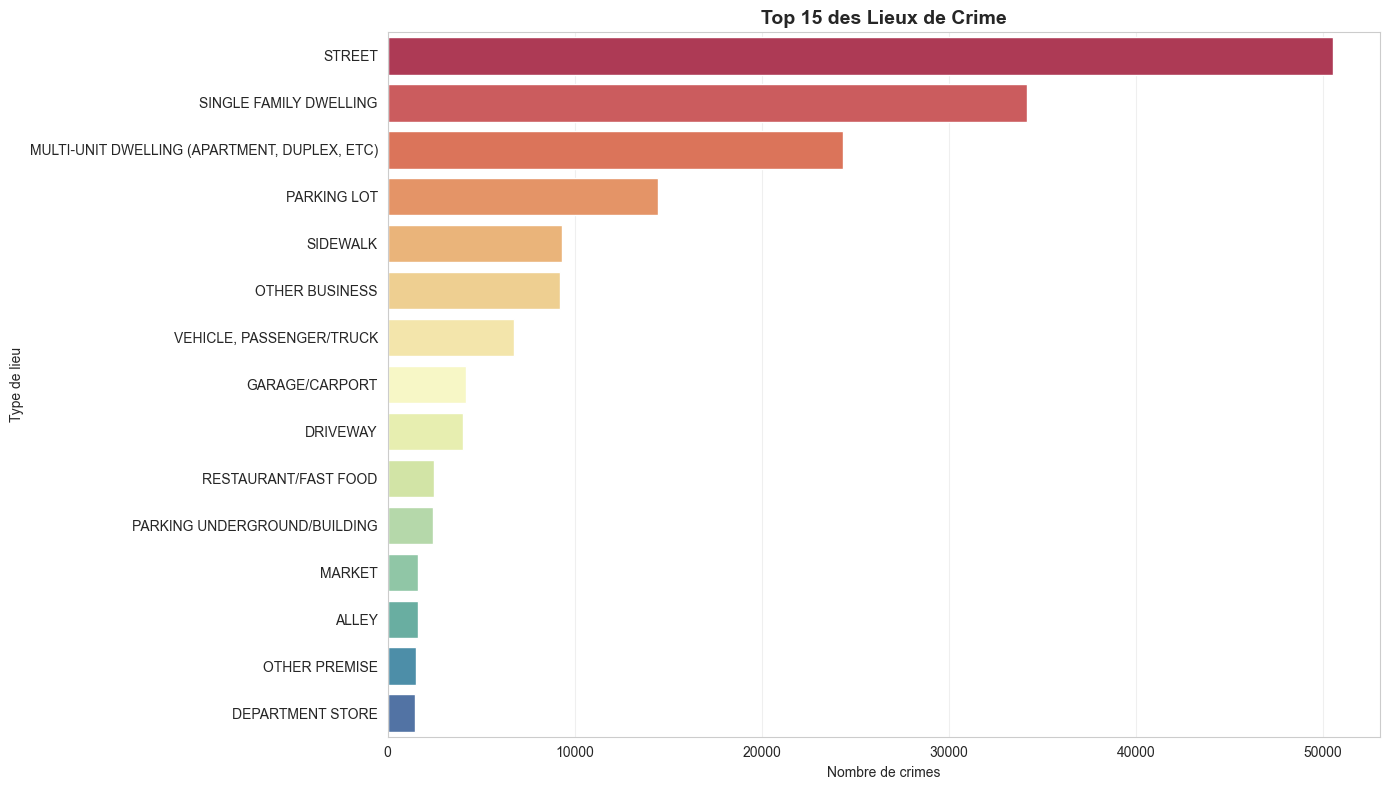


🏢 Lieu le plus criminel : STREET (50526 crimes)


In [24]:
premis_counts = df_clean['Premis Desc'].value_counts().head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=premis_counts.values, y=premis_counts.index, palette='Spectral')
plt.title('Top 15 des Lieux de Crime', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de crimes')
plt.ylabel('Type de lieu')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🏢 Lieu le plus criminel : {premis_counts.index[0]} ({premis_counts.values[0]} crimes)")

## 10. Analyse en Composantes Principales (ACP)

In [25]:
# Sélection des variables numériques
numeric_cols = ['Vict Age', 'Crm Cd 1', 'Premis Cd', 'Hour', 'LAT', 'LON']
numeric_cols = [col for col in numeric_cols if col in df_clean.columns]

df_numeric = df_clean[numeric_cols].dropna()
print(f"📊 Variables numériques pour l'ACP : {numeric_cols}")
print(f"   Données après suppression des NaN : {df_numeric.shape}")

📊 Variables numériques pour l'ACP : ['Vict Age', 'Crm Cd 1', 'Premis Cd', 'Hour', 'LAT', 'LON']
   Données après suppression des NaN : (199049, 6)


In [26]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# ACP
pca = PCA()
pca.fit(X_scaled)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = explained_variance.cumsum()

variance_df = pd.DataFrame({
    'Composante': [f"PC{i+1}" for i in range(len(explained_variance))],
    'Variance Expliquée': explained_variance,
    'Variance Cumulée': cum_explained_variance
})

print("\n📊 Variance expliquée par composante :")
variance_df


📊 Variance expliquée par composante :


,Composante,Variance Expliquée,Variance Cumulée
0,PC1,0.266855,0.266855
1,PC2,0.201978,0.468833
2,PC3,0.169522,0.638355
3,PC4,0.162183,0.800538
4,PC5,0.128827,0.929364
5,PC6,0.070636,1.000000


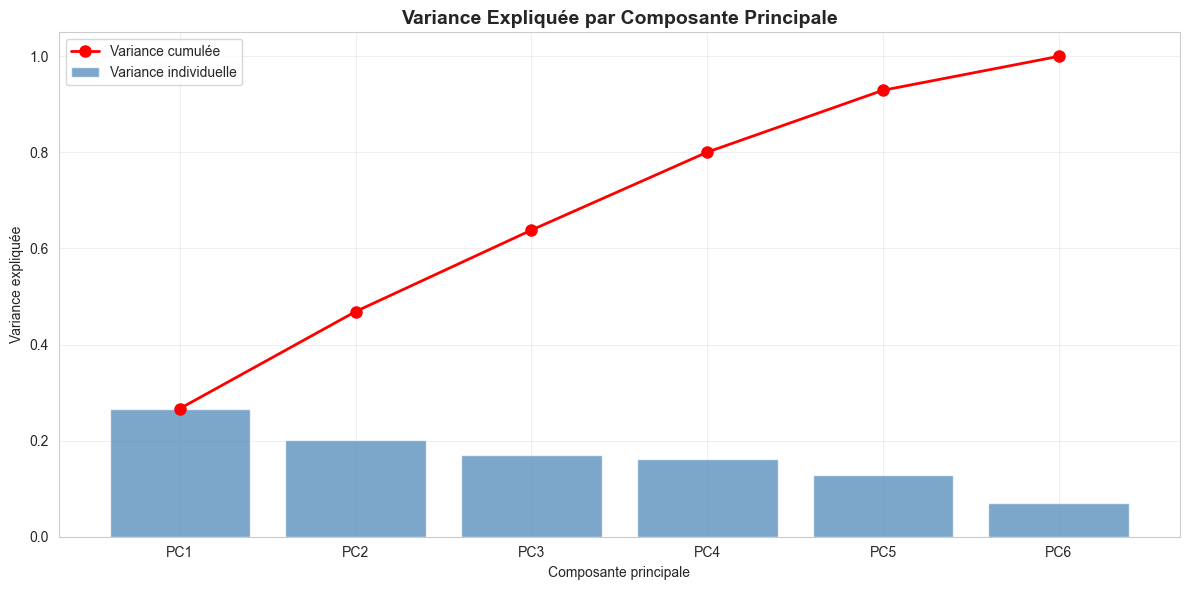

In [27]:
# Visualisation de la variance
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(variance_df['Composante'], variance_df['Variance Expliquée'], color='steelblue', alpha=0.7, label='Variance individuelle')
ax.plot(variance_df['Composante'], variance_df['Variance Cumulée'], color='red', marker='o', linewidth=2, markersize=8, label='Variance cumulée')
ax.set_xlabel("Composante principale")
ax.set_ylabel("Variance expliquée")
ax.set_title("Variance Expliquée par Composante Principale", fontsize=14, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

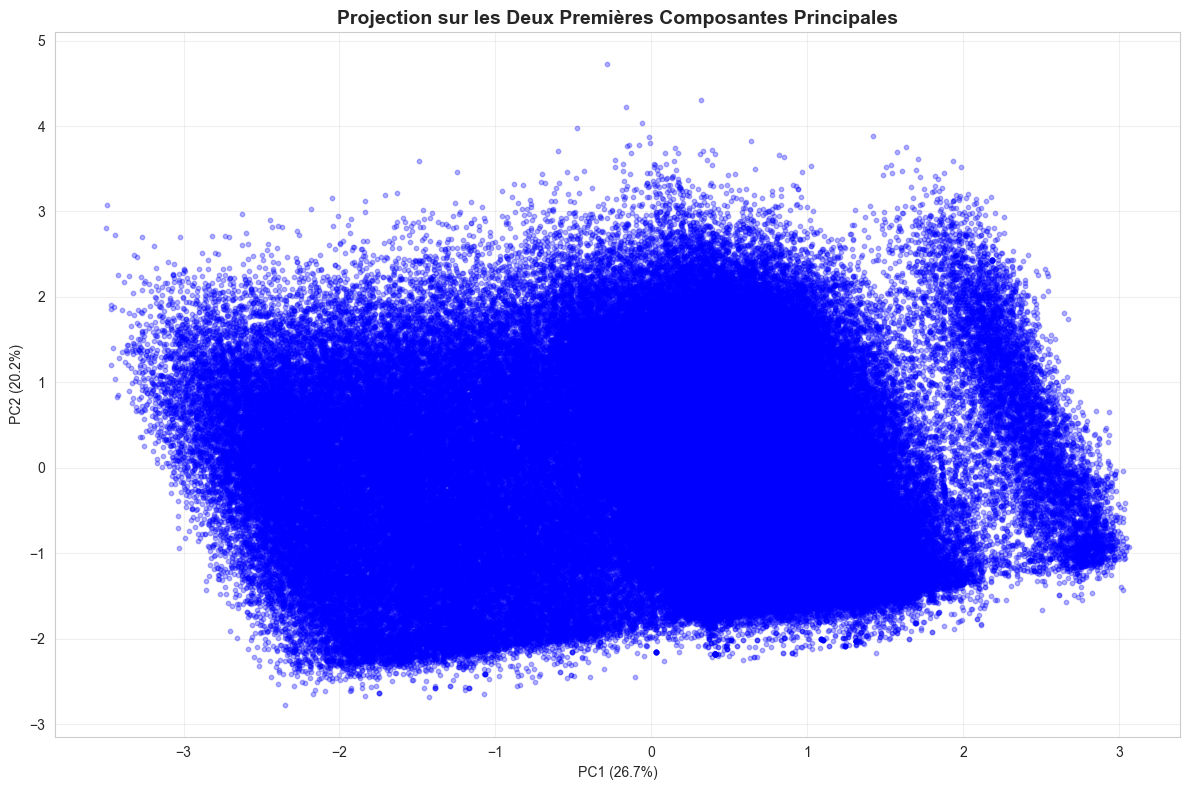

In [28]:
# Projection 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.3, c='blue', s=10)
plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}%)")
plt.title("Projection sur les Deux Premières Composantes Principales", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

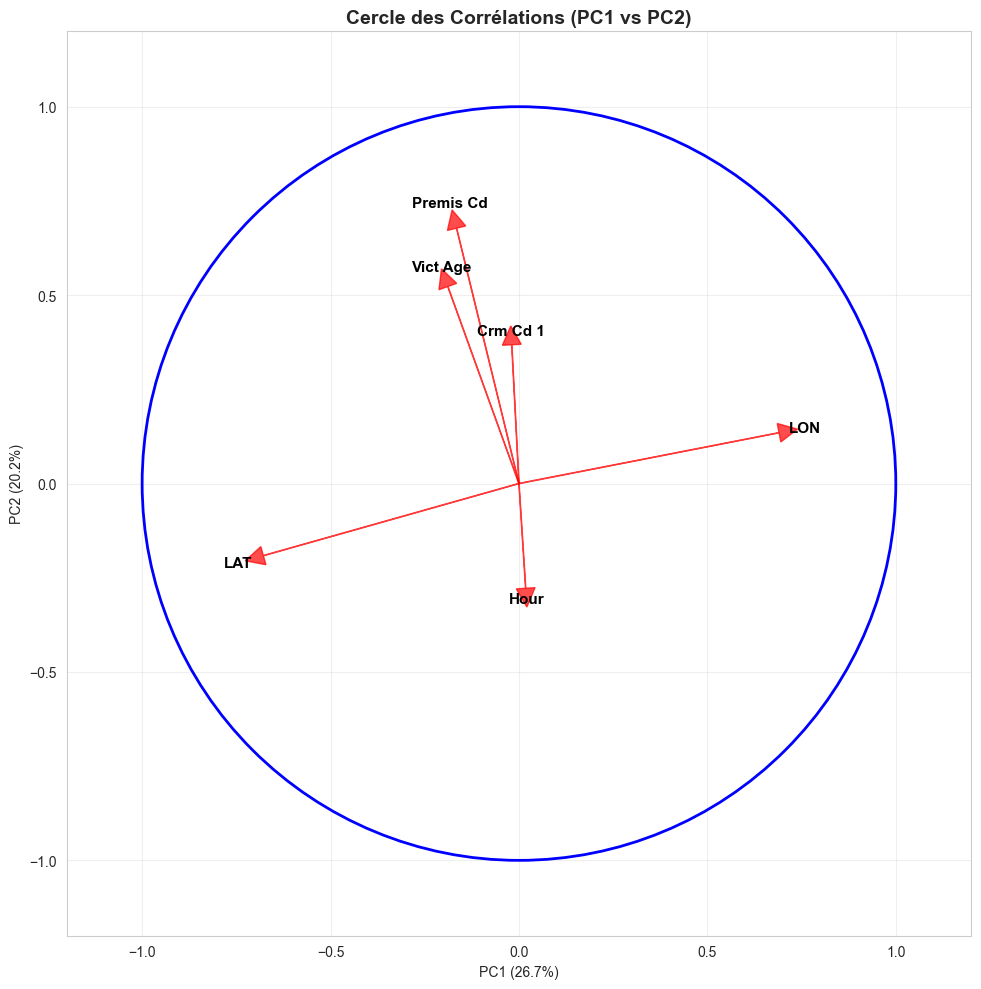

In [29]:
# Cercle des corrélations
pcs = pca.components_

fig, ax = plt.subplots(figsize=(10, 10))
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linewidth=2)
ax.add_artist(circle)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    ax.arrow(0, 0, x, y, color='red', alpha=0.7, head_width=0.05, head_length=0.05)
    ax.text(x*1.1, y*1.1, numeric_cols[i], color='black', ha='center', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel(f"PC1 ({explained_variance[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({explained_variance[1]*100:.1f}%)")
ax.set_title("Cercle des Corrélations (PC1 vs PC2)", fontsize=14, fontweight='bold')
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.grid(alpha=0.3)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

## 11. Corrélations entre Variables

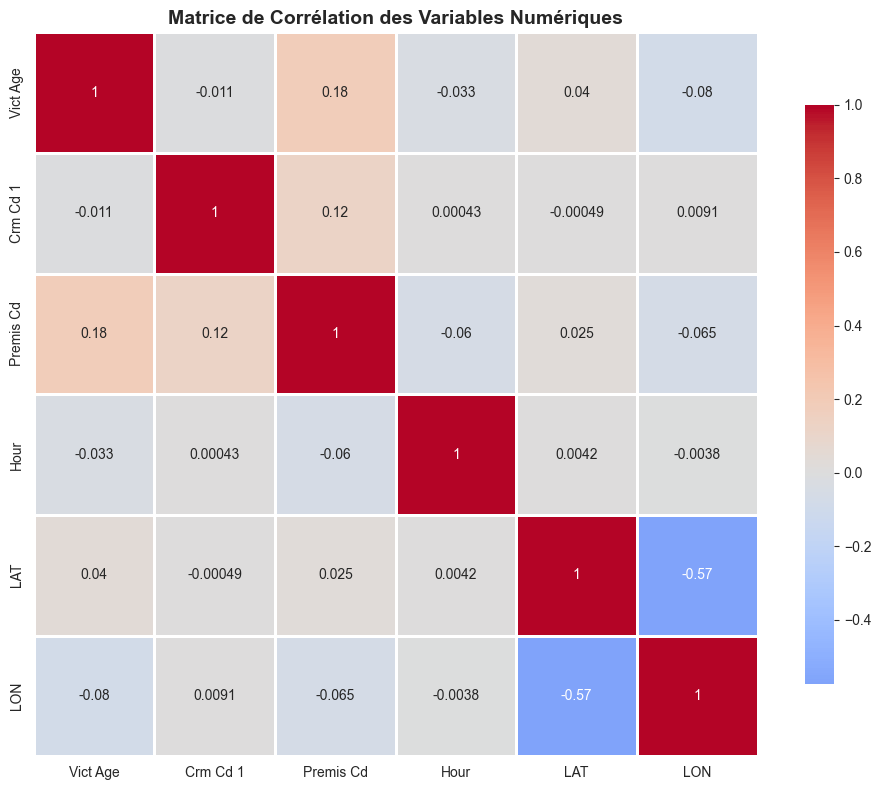

In [30]:
# Matrice de corrélation
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 12. Sauvegarde des Données Nettoyées

In [31]:
# Sauvegarder les données nettoyées
output_path = '../data/processed/crime_2020_processed.csv'
df_clean.to_csv(output_path, index=False)
print(f"✅ Données nettoyées sauvegardées : {output_path}")
print(f"   Dimensions finales : {df_clean.shape}")

✅ Données nettoyées sauvegardées : ../data/processed/crime_2020_processed.csv
   Dimensions finales : (199840, 29)


## 13. Résumé de l'Analyse

In [32]:
print("="*60)
print("📊 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE")
print("="*60)
print(f"\n📂 Données analysées :")
print(f"   - Nombre total de crimes : {len(df_clean):,}")
print(f"   - Période : 2020")
print(f"   - Nombre de variables : {df_clean.shape[1]}")

print(f"\n⏰ Insights temporels :")
print(f"   - Heure la plus criminelle : {df_clean['Hour of Day'].mode()[0]}h")
print(f"   - Jour le plus criminel : {df_clean['Day of Week'].value_counts().idxmax()}")
print(f"   - Mois le plus criminel : {df_clean['Month'].value_counts().idxmax()}")

print(f"\n🏙️ Insights géographiques :")
print(f"   - Zone la plus criminelle : {df_clean['AREA NAME'].value_counts().idxmax()}")
print(f"   - Nombre de zones : {df_clean['AREA NAME'].nunique()}")

print(f"\n🔴 Insights sur les crimes :")
print(f"   - Crime le plus fréquent : {df_clean['Crm Cd Desc'].value_counts().idxmax()}")
print(f"   - Nombre de types de crimes : {df_clean['Crm Cd Desc'].nunique()}")
print(f"   - Lieu le plus criminel : {df_clean['Premis Desc'].value_counts().idxmax()}")

print(f"\n👥 Insights sur les victimes :")
print(f"   - Âge médian des victimes : {df_clean['Vict Age'].median():.0f} ans")
print(f"   - Sexe le plus touché : {df_clean['Vict Sex'].value_counts().idxmax()}")

print("\n" + "="*60)
print("✅ ANALYSE EXPLORATOIRE TERMINÉE")
print("="*60)

📊 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE

📂 Données analysées :
   - Nombre total de crimes : 199,840
   - Période : 2020
   - Nombre de variables : 29

⏰ Insights temporels :
   - Heure la plus criminelle : 12h
   - Jour le plus criminel : Friday
   - Mois le plus criminel : January

🏙️ Insights géographiques :
   - Zone la plus criminelle : 77th Street
   - Nombre de zones : 21

🔴 Insights sur les crimes :
   - Crime le plus fréquent : VEHICLE - STOLEN
   - Nombre de types de crimes : 129
   - Lieu le plus criminel : STREET

👥 Insights sur les victimes :
   - Âge médian des victimes : 31 ans
   - Sexe le plus touché : M

✅ ANALYSE EXPLORATOIRE TERMINÉE


In [ ]:
# !dvc add ../data/processed/crime_2020_processed.csv
# !dvc push
# !git add ../data/processed/crime_2020_processed.csv.dvc
# !git commit -m "Add preprocessed 2020 data"
# !git push


To track the changes with git, run:

	git add '..\data\processed\crime_2020_processed.csv.dvc'

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



Everything is up to date.


Aiohttp retry client was not closed


On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../.dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../data/processed/.gitignore
	../mlflow.db
	../mlruns/
	../model_artifacts/
	../models/
	./
	../src/

no changes added to commit (use "git add" and/or "git commit -a")


fatal: The current branch master has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin master

To have this happen automatically for branches without a tracking
upstream, see 'push.autoSetupRemote' in 'git help config'.



In [37]:
df_clean['Crm Cd Desc'].value_counts().to_csv("crime_counts.csv")


In [83]:
def map_crime_group_4(desc):
    desc = desc.upper()

    # 1️⃣ Violent Crime (incl. Sexual)
    if any(k in desc for k in [
        "ASSAULT", "BATTERY", "ROBBERY", "HOMICIDE",
        "MANSLAUGHTER", "KIDNAPPING", "CRIMINAL THREATS",
        "INTIMATE PARTNER", "RAPE", "SEX", "SODOMY",
        "ORAL COPULATION", "LEWD", "PORNOGRAPHY",
        "FALSE IMPRISONMENT"
    ]):
        return "Violent Crime"

    # 2️⃣ Property & Theft Crime
    if any(k in desc for k in [
        "THEFT", "BURGLARY", "SHOPLIFTING",
        "VANDALISM", "ARSON", "PICKPOCKET",
        "PURSE SNATCH", "TRESPASS", "BIKE",
        "ILLEGAL DUMPING"
    ]):
        return "Property & Theft Crime"

    # 3️⃣ Vehicle-Related Crime
    if any(k in desc for k in [
        "VEHICLE", "DWOC", "MOTOR VEHICLE",
        "BOAT"
    ]):
        return "Vehicle-Related Crime"

    # 4️⃣ Other / Fraud / Public Order Crime
    return "Other / Fraud / Public Order Crime"


In [84]:
df_clean["Crime_Group"] = df_clean["Crm Cd Desc"].apply(map_crime_group_4)

In [85]:
df_clean["Crime_Group"].value_counts()

Crime_Group
Property & Theft Crime                100687
Violent Crime                          62661
Vehicle-Related Crime                  21645
Other / Fraud / Public Order Crime     14847
Name: count, dtype: int64

In [54]:
# Chemin vers les données
DATA = "C:/Users/MSI_/Desktop/Ingenierie2/S2/projetAnalyse/Crime_Data_from_2020_to_Present.csv"

# Chargement
df = pd.read_csv(DATA)
print(f"📂 Données chargées : {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f"\n📊 Période : {df['DATE OCC'].min()} à {df['DATE OCC'].max()}")

📂 Données chargées : 1003448 lignes, 28 colonnes

📊 Période : 01/01/2020 12:00:00 AM à 12/31/2023 12:00:00 AM


In [60]:
print(df['Crm Cd Desc'].nunique())
df["Crm Cd Desc"].value_counts()

140


Crm Cd Desc
VEHICLE - STOLEN                                            115186
BATTERY - SIMPLE ASSAULT                                     74816
BURGLARY FROM VEHICLE                                        63259
THEFT OF IDENTITY                                            62408
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      60956
BURGLARY                                                     57873
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               53522
THEFT PLAIN - PETTY ($950 & UNDER)                           53480
INTIMATE PARTNER - SIMPLE ASSAULT                            46712
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              41269
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          36810
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     35009
ROBBERY                                                      32314
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     30743
VANDALISM - MISDEAMEANOR ($399 OR UNDER)          

In [61]:
df['Crm Cd Desc'].value_counts().to_csv("crime_counts.csv")